# Viano (1989): Hub impacts
```{note}
- Oblique Hub Impact to thorax and abdomen 
- lateral impact to  pelvis
```

- Performed by: 
- Reviewed by:
- Last modified : 8th January 2024
- SAFER HBM Version:  
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-10.0-1?style=flat&logoColor=blue&labelColor=whitw&color=green)
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)

## Experiment by Kent Viano (1989)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Kang et al.  <sup>[1]</sup>
1. Viano, David C. "Biomechanical responses and injuries in blunt lateral impact." SAE transactions (1989): 1690-1719.[Article](https://www.jstor.org/stable/pdf/44472411.pdf)

```{figure} _env/setup_viano_hub_S11.png
---
align: center
---
Hub impact to Thorax, abdomen and hip
```

### Information on the subjects/specimens

| **Runs** | **Cadaver #** | **Sex** | **Age [years]** | **Weight [kg]** | **Height [cm]** |
|:--------:|:-------------:|:-------:|:---------------:|:---------------:|:---------------:|
|     2    |      863      |   Male  |        49       |       107       |       176       |
|     3    |      RNY1     |  Female |        76       |        44       |      153.5      |
|     4    |      935      |   Male  |        63       |      69.85      |       174       |
|    5,6   |      947      |   Male  |        38       |      56.25      |      166.5      |
|    7,8   |      954      |   Male  |        66       |      56.25      |       159       |
|    9,10   |      RNY2     |   Male  |        64       |      61.69      |       171       |
|   11-13  |      956      |  Female |        40       |       76.2      |       175       |
|   14-16  |      993      |   Male  |        49       |      70.76      |       173       |
|   17-22  |      986      |   Male  |        29       |       70.3      |       173       |
|   23-28  |      047      |   Male  |        62       |      83.91      |      176.5      |
|   29-33  |      008      |  Female |        52       |      53.07      |       157       |
|   34,35  |      063      |   Male  |        64       |      48.54      |       173       |
|   36-39  |      UOM1     |   Male  |        37       |      67.59      |      186.5      |
|   40,45  |      UOM2     |   Male  |        64       |      75.76      |      178.5      |
### Loading and Boundary Conditions
- Tests on 15 specimens
### Boundary Conditions
- `Coordinate system `              : aligned with Global in simulations
> **Setup**
> - ***Load case***                     : oblique lateral throx impact
> - ***impactor dimensions***       : `MAT_RIGID` cylinder wirg diameter $150mm$, height $60mm$ and mass $23.4kg$
> - ***impact location***                    : Center of the pendulum aligned with Xiphoid process and rotated $30^0$
> - ***Contacts***                        : `*CONTACT_AUTOMATIC_SURFACE_TO_SURFACE` with $fs=0.3 , vdc=20, soft=2$ between the impator and the HBM (without the arms `PID`).
>
> **Constraints and Loading** 
> - ***Loads***            : 
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of impactor at 4.4 m/s, 6.5m/s and 9.5 m/s
>   *  No gravity defined
>   *  Termination time set to 60ms

### Responses recorded
- Contact force is measured at the impactor and HBM.
- Rigid impactor displacement

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.


### Other comments
- The impactor in the tests are aligned to the Xiphoid process, which is 75 mm below the geometrial center of the sternum [1].
- In the SAFER V10.0 the mid point of the Xiphoid proces and the sternum is 78 mm apart.
- All the simulations for the thoracic impact is aligned to the center of the Xiphoid proces in the FE model.

In [1]:
import os
import glob
import sys
# for data analysis
import pandas as pd
import numpy as np
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s10 = {"linestyle" :'-', "color" : 'g',"alpha" :1,"linewidth":2}
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'b',"alpha" : 0.7,"linewidth":1}
pmhs_i = {"linestyle" :'--', "color" : 'b',"alpha" : 0.5,"linewidth":1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" : 0.5,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.5,"linewidth":1}
pmhs_average = {"linestyle" :'-.', "color" : 'k',"alpha" : 1,"linewidth":1, 'marker' :"o", 'markevery': 75}
test_corr = {"color": 'grey',"alpha" : 0.4}
test_lim = {"marker" :'o',"linestyle":'--',"color": 'grey',"alpha" : 1}
# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [3]:
Tests=["Thorax_4.4","Thorax_6.5", "Thorax_9.5","Abdomen_4.8","Abdomen_6.8", "Abdomen_9.4","Pelvis_5.2","Pelvis_9.8"]
experiment_dir= "data/experiment_data/"
df_v10={}
df_v11={}
exp={}
for test in Tests:
    # Import processed data
    df_v10[test]=pd.read_csv(os.path.join(os.path.join("data/processed/SAFER10.0",test),"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])
    df_v11[test]=pd.read_csv(os.path.join(os.path.join("data/processed/SAFER11.0",test),"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])


In [6]:
# Experiment data
TX_4_4=pd.read_csv(os.path.join(experiment_dir,'TX_4.4.csv'), delimiter=';',na_values='-')
TX_6_5=pd.read_csv(os.path.join(experiment_dir,'TX_6.5.csv'), delimiter=';',na_values='-')
TX_9_5=pd.read_csv(os.path.join(experiment_dir,'TX_9.5.csv'), delimiter=';',na_values='-')
Thorax_Exp=pd.read_csv(os.path.join(experiment_dir,'Thorax.csv'), delimiter=';',na_values='-')
Abdomen_Exp=pd.read_csv(os.path.join(experiment_dir,'abdomen.csv'), delimiter=';',na_values='-')
AB_4_8=pd.read_csv(os.path.join(experiment_dir,'AB_4.8.csv'), delimiter=';',na_values='-')
AB_6_8=pd.read_csv(os.path.join(experiment_dir,'AB_6.8.csv'), delimiter=';',na_values='-')
AB_9_4=pd.read_csv(os.path.join(experiment_dir,'AB_9.4.csv'), delimiter=';',na_values='-')

PL_5_2=pd.read_csv(os.path.join(experiment_dir,'PL_5.2.csv'), delimiter=';',na_values='-', header = [0,1,2])
PL_9_3=pd.read_csv(os.path.join(experiment_dir,'PL_9.8.csv'), delimiter=';',na_values='-', header = [0,1,2])

In [7]:
## Resample data
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(0,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newx).flatten(),np.array(newy).flatten()

In [8]:
TX_t_4_4=[17,36,40,41]
TX_t_6_5=[5,7,9]
TX_t_9_5=[2,14,18,33,37]
AB_t_4_8=[19,23,24,42,43]
AB_t_6_8=[6,8,10]
AB_t_9_4=[15,20,28,34]

df_res = pd.DataFrame(columns=['Impact velocity','Ref Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])


T_samp=np.arange(0,60,0.1)
df=pd.DataFrame(T_samp)
test_average={}
for test in Tests:
    df=pd.DataFrame(T_samp)
    if test=="Thorax_4.4":
        test_nr= TX_t_4_4
        data=TX_4_4
    elif test=="Thorax_6.5":
        test_nr= TX_t_6_5
        data=TX_6_5
    elif test=="Thorax_9.5":
        test_nr= TX_t_9_5
        data=TX_9_5
    if test=="Abdomen_4.8":
        test_nr= AB_t_4_8
        data=AB_4_8
    elif test=="Abdomen_6.8":
        test_nr= AB_t_6_8
        data=AB_6_8
    elif test=="Abdomen_9.4":
        test_nr= AB_t_9_4
        data=AB_9_4
    for i in test_nr:
        exp_t=data['R_{}_t'.format(i)].dropna()
        exp_v=data['R_{}_f'.format(i)].dropna()
        r_t,r_v=resam(exp_t,exp_v,60)
        df[i]=r_v
    test_average[test]=df.iloc[:,1:].mean(axis=1)
    
    
experimental_data={}

experimental_data['Pelvis_5.2']=PL_5_2['Force'][['21','25','26','31']]
experimental_data['Pelvis_9.8']=PL_9_3['Force'][['22','27','32','39']]

endT=[46,27.5]
positions=['Pelvis_5.2','Pelvis_9.8']
i=0
for pos in positions:
    T_samp=np.arange(0,endT[i],0.1)
    df=pd.DataFrame(T_samp)
    df_test=experimental_data[pos]
    for p in range(0,len(df_test.keys()),2):
        exp_t=df_test[df_test.keys()[p][0]].X.dropna()
        exp_v=df_test[df_test.keys()[p][0]].Y.dropna()
        r_t,r_v=resam(exp_t,exp_v,endT[i])
        df[p]=r_v
    test_average[pos]=df.mean(axis=1)
    i=i+1

## Thorax Impact response
### Force deflection Plot

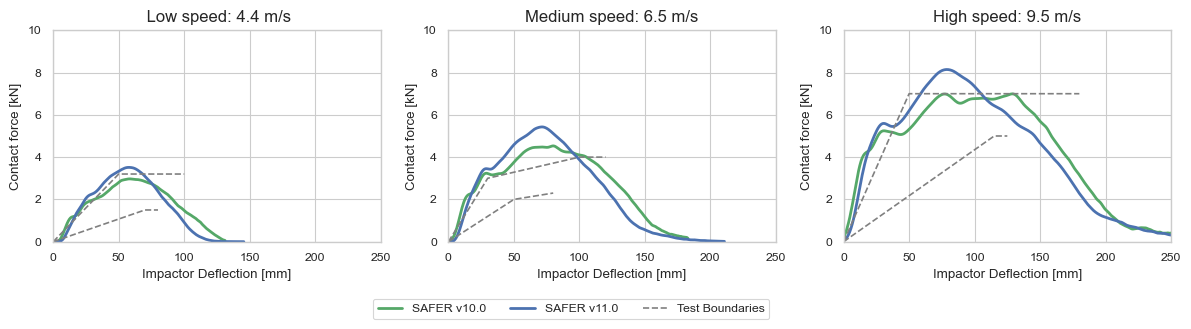

In [19]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))
for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('Impactor Deflection [mm]');

axs[0].set_title(' Low speed: 4.4 m/s',fontsize=12)
axs[0].plot(-(df_v10["Thorax_4.4"]['IMPACTOR']['Disp_x']['displacement']), 
            df_v10["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s10, label = "SAFER v10.0")
axs[0].plot(-(df_v11["Thorax_4.4"]['IMPACTOR']['Disp_x']['displacement'])-2, 
            df_v11["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11, label = "SAFER v11.0")
axs[0].plot(Thorax_Exp['Thorax_LS:Deflection [cm]']*10, Thorax_Exp['Thorax_LS:Force_D [kN]'],'--',color='grey', label = "Test Boundaries")
axs[0].set_ylim([0,10])
axs[0].set_xlim([0,250])
    
axs[1].set_title('Medium speed: 6.5 m/s',fontsize=12)
axs[1].plot(-(df_v10["Thorax_6.5"]['IMPACTOR']['Disp_x']['displacement']), df_v10["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s10)
axs[1].plot(-(df_v11["Thorax_6.5"]['IMPACTOR']['Disp_x']['displacement'])-2, df_v11["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[1].plot(Thorax_Exp['Thorax_MS:Deflection [cm]']*10, Thorax_Exp['Thorax_MS:Force_D [kN]'],'--',color='grey')
axs[1].set_ylim([0,10])
axs[1].set_xlim([0,250])

axs[2].set_title('High speed: 9.5 m/s',fontsize=12)
axs[2].plot(-(df_v10["Thorax_9.5"]['IMPACTOR']['Disp_x']['displacement']), df_v10["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s10)
axs[2].plot(-(df_v11["Thorax_9.5"]['IMPACTOR']['Disp_x']['displacement'])-2, df_v11["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[2].plot(Thorax_Exp['Thorax_HS:Deflection [cm]']*10, Thorax_Exp['Thorax_HS:Force_D [kN]'],'--',color='grey')
axs[2].set_ylim([0,10])
axs[2].set_xlim([0,250])

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=3)
fig_fd.tight_layout()

### Force Time Plot

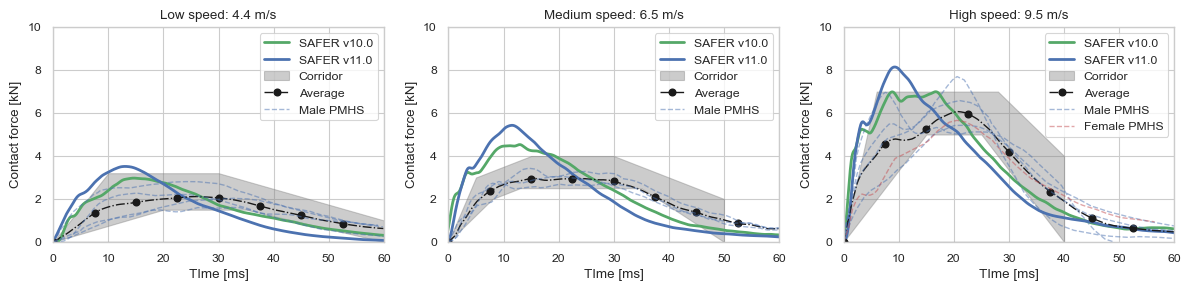

In [23]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))

for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('TIme [ms]');
    axs[i].set_ylim([0,10])
    axs[i].set_xlim([0,60])

axs[0].set_title('Low speed: 4.4 m/s')
axs[0].plot(df_v10["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[0].plot(df_v11["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-2, df_v11["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[0].fill_between(Thorax_Exp['Thorax_LS:Time [ms]'], Thorax_Exp['Thorax_LS:Force [kN]'], label = "Corridor",**test_corr)
axs[0].plot(np.arange(0,60,0.1),test_average["Thorax_4.4"], label = "Average",**pmhs_average)
axs[0].plot(TX_4_4['R_17_t'], TX_4_4['R_17_f'], label = "Male PMHS ",**pmhsM)
axs[0].plot(TX_4_4['R_36_t'], TX_4_4['R_36_f'],**pmhsM)
axs[0].plot(TX_4_4['R_40_t'], TX_4_4['R_40_f'],**pmhsM)
axs[0].plot(TX_4_4['R_41_t'], TX_4_4['R_41_f'],**pmhsM)
axs[0].legend()
# axs[0].set_ylim([0,4])
    
axs[1].set_title('Medium speed: 6.5 m/s')
axs[1].plot( df_v10["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, df_v10["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[1].plot( df_v11["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, df_v11["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[1].fill_between(Thorax_Exp['Thorax_MS:Time [ms]'], Thorax_Exp['Thorax_MS:Force [kN]'], label = "Corridor",**test_corr)
axs[1].plot(np.arange(0,60,0.1),test_average["Thorax_6.5"], label = "Average",**pmhs_average)
axs[1].plot(TX_6_5['R_5_t'], TX_6_5['R_5_f'], label = "Male PMHS",**pmhsM)
axs[1].plot(TX_6_5['R_7_t'], TX_6_5['R_7_f'], **pmhsM)
axs[1].plot(TX_6_5['R_9_t'], TX_6_5['R_9_f'],**pmhsM)
axs[1].legend()
# axs[1].set_ylim([0,5])

axs[2].set_title('High speed: 9.5 m/s')
axs[2].plot(df_v10["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[2].plot(df_v11["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v11["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[2].fill_between(Thorax_Exp['Thorax_HS:Time [ms]'], Thorax_Exp['Thorax_HS:Force [kN]'], label = "Corridor",**test_corr)
axs[2].plot(np.arange(0,60,0.1),test_average["Thorax_9.5"], label = "Average",**pmhs_average)
axs[2].plot(TX_9_5['R_2_t'], TX_9_5['R_2_f'], label = "Male PMHS",**pmhsM)
axs[2].plot(TX_9_5['R_14_t'], TX_9_5['R_14_f'],**pmhsM)
axs[2].plot(TX_9_5['R_18_t'], TX_9_5['R_18_f'],**pmhsM)
axs[2].plot(TX_9_5['R_33_t'], TX_9_5['R_33_f'],**pmhsF, label = "Female PMHS")
axs[2].plot(TX_9_5['R_37_t'], TX_9_5['R_37_f'],**pmhsM)
# axs[2].set_ylim([0,8])
axs[2].legend()
fig_fd.tight_layout()


## Abdomen Impact response
### Force deflection Plot

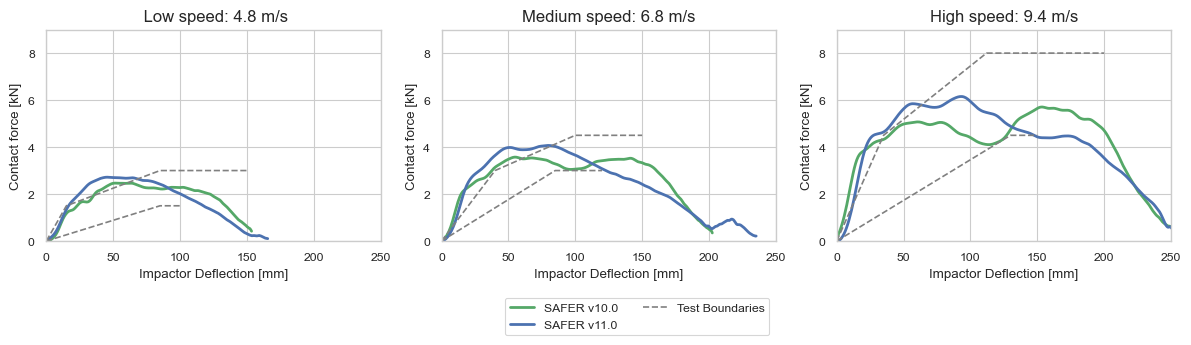

In [26]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))
for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('Impactor Deflection [mm]');
    
axs[0].set_title(' Low speed: 4.8 m/s',fontsize=12)
axs[0].plot(-df_v10["Abdomen_4.8"]['IMPACTOR']['Disp_x']['displacement'], df_v10["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s10, label = "SAFER v10.0")
axs[0].plot(-df_v11["Abdomen_4.8"]['IMPACTOR']['Disp_x']['displacement']-10, df_v11["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11, label = "SAFER v11.0")
axs[0].plot(Abdomen_Exp['LS_D']*10, Abdomen_Exp['LS_Fd'],'--',color='grey', label = "Test Boundaries")
axs[0].set_ylim([0,9])
axs[0].set_xlim([0,250])
    
axs[1].set_title('Medium speed: 6.8 m/s',fontsize=12)
axs[1].plot(-df_v10["Abdomen_6.8"]['IMPACTOR']['Disp_x']['displacement'], df_v10["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s10)
axs[1].plot(-df_v11["Abdomen_6.8"]['IMPACTOR']['Disp_x']['displacement']-7, df_v11["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[1].plot(Abdomen_Exp['MS_D']*10, Abdomen_Exp['MS_Fd'],'--',color='grey')
axs[1].set_ylim([0,9])
axs[1].set_xlim([0,250])

axs[2].set_title('High speed: 9.4 m/s',fontsize=12)
axs[2].plot(-df_v10["Abdomen_9.4"]['IMPACTOR']['Disp_x']['displacement'], df_v10["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s10)
axs[2].plot(-df_v11["Abdomen_9.4"]['IMPACTOR']['Disp_x']['displacement']-5, df_v11["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[2].plot(Abdomen_Exp['HS_D']*10, Abdomen_Exp['HS_Fd'],'--',color='grey')
axs[2].set_ylim([0,9])
axs[2].set_xlim([0,250])

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=2)
fig_fd.tight_layout()


### Force Time Plot

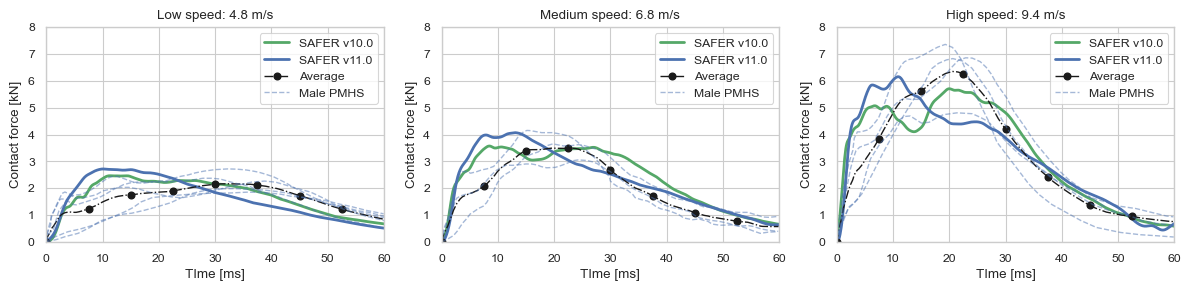

In [30]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))

for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('TIme [ms]');
    axs[i].set_ylim([0,8])
    axs[i].set_xlim([0,60])


axs[0].set_title('Low speed: 4.8 m/s')
axs[0].plot(df_v10["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[0].plot(df_v11["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-2, df_v11["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[0].plot(np.arange(0,60,0.1),test_average["Abdomen_4.8"], label = "Average",**pmhs_average)
axs[0].plot(AB_4_8['R_19_t'], AB_4_8['R_19_f'], **pmhsM, label = "Male PMHS")
axs[0].plot(AB_4_8['R_23_t'], AB_4_8['R_23_f'], **pmhsM)
axs[0].plot(AB_4_8['R_24_t'], AB_4_8['R_24_f'], **pmhsM)
axs[0].plot(AB_4_8['R_42_t'], AB_4_8['R_42_f'], **pmhsM)
axs[0].plot(AB_4_8['R_43_t'], AB_4_8['R_43_f'], **pmhsM)
axs[0].legend()
    
axs[1].set_title('Medium speed: 6.8 m/s')
axs[1].plot( df_v10["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[1].plot( df_v11["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, df_v11["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[1].plot(np.arange(0,60,0.1),test_average["Abdomen_6.8"], label = "Average",**pmhs_average)
axs[1].plot(AB_6_8['R_6_t'], AB_6_8['R_6_f'],**pmhsM, label = "Male PMHS")
axs[1].plot(AB_6_8['R_8_t'], AB_6_8['R_8_f'],**pmhsM)
axs[1].plot(AB_6_8['R_10_t'], AB_6_8['R_10_f'], **pmhsM)
axs[1].legend()

axs[2].set_title('High speed: 9.4 m/s')
axs[2].plot(df_v10["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[2].plot(df_v11["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-0.5, df_v11["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[2].plot(np.arange(0,60,0.1),test_average["Abdomen_9.4"], label = "Average",**pmhs_average)
axs[2].plot(AB_9_4['R_15_t'], AB_9_4['R_15_f'], **pmhsM, label = "Male PMHS")
axs[2].plot(AB_9_4['R_20_t'], AB_9_4['R_20_f'], **pmhsM)
axs[2].plot(AB_9_4['R_28_t'], AB_9_4['R_28_f'], **pmhsM)
axs[2].plot(AB_9_4['R_34_t'], AB_9_4['R_34_f'], **pmhsM)
axs[2].legend()
fig_fd.tight_layout()




## Pelvis impact response
### Force time history

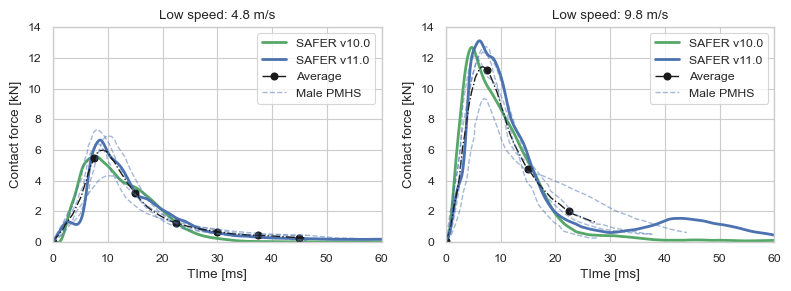

In [32]:
fig_fd, axs = plt.subplots(nrows=1, ncols=2,figsize=(8,3))

for i in range(0,2):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('TIme [ms]');
    axs[i].set_ylim([0,14])
    axs[i].set_xlim([0,60])

axs[0].set_title('Low speed: 4.8 m/s')
axs[0].plot(df_v10["Pelvis_5.2"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Pelvis_5.2"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[0].plot(df_v11["Pelvis_5.2"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-3, df_v11["Pelvis_5.2"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[0].plot(np.arange(0,46,0.1),test_average["Pelvis_5.2"], label = "Average",**pmhs_average)
axs[0].plot(PL_5_2.Force['21'].X, PL_5_2.Force['21'].Y, label = "Male PMHS",**pmhsM)
axs[0].plot(PL_5_2.Force['25'].X, PL_5_2.Force['25'].Y,**pmhsM)
axs[0].plot(PL_5_2.Force['26'].X, PL_5_2.Force['26'].Y,**pmhsM)
axs[0].plot(PL_5_2.Force['31'].X, PL_5_2.Force['31'].Y,**pmhsM)
axs[0].legend()
    
axs[1].set_title('Low speed: 9.8 m/s')
axs[1].plot(df_v10["Pelvis_9.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], df_v10["Pelvis_9.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v10.0",**s10)
axs[1].plot(df_v11["Pelvis_9.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, df_v11["Pelvis_9.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[1].plot(np.arange(0,27.5,0.1),test_average["Pelvis_9.8"], label = "Average",**pmhs_average)
axs[1].plot(PL_9_3.Force['22'].X, PL_9_3.Force['22'].Y, label = "Male PMHS",**pmhsM)
axs[1].plot(PL_9_3.Force['27'].X, PL_9_3.Force['27'].Y,**pmhsM)
axs[1].plot(PL_9_3.Force['32'].X, PL_9_3.Force['32'].Y,**pmhsM)
axs[1].plot(PL_9_3.Force['39'].X, PL_9_3.Force['39'].Y, **pmhsM)
axs[1].legend()

fig_fd.tight_layout()

## ISO18571 objective rating for force-time histories

In [33]:
df_v10_ISO=pd.read_csv(os.path.join("data/processed/SAFER10.0","ISO.csv"), delimiter=',', na_values='-', header = [0])
df_v11_ISO=pd.read_csv(os.path.join("data/processed/SAFER11.0","ISO.csv"), delimiter=',', na_values='-', header = [0])

SHBM V10.0 
 Average: 	 0.7 
 Range: 	 0.52-0.85
--------------------------------------------------------------
SHBM V11.0 
 Average: 	 0.57 
 Range: 	 0.29-0.9


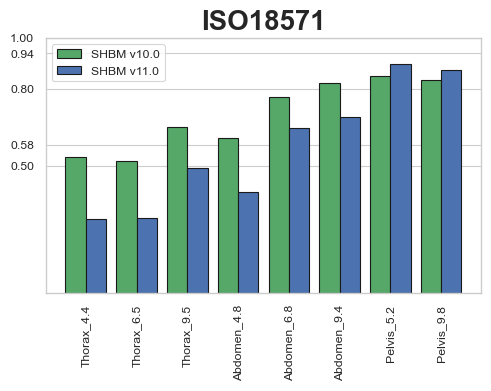

In [37]:
B10={'width' : 0.4 , 'color':'g','alpha':1, 'edgecolor':'k'}
B11={'width' : 0.4 , 'color':'b','alpha':1, 'edgecolor':'k'}

fig, ax = plt.subplots(figsize=(5, 4))
br1 = np.arange(len(df_v11_ISO))
ax.bar(br1-0.2,df_v10_ISO['Overall Score'].values,**B10,label='SHBM v10.0')
ax.bar(br1+0.2,df_v11_ISO['Overall Score'].values,**B11,label='SHBM v11.0')

plt.xticks(range(len(df_v11_ISO)), df_v11_ISO['Impact velocity'], rotation=90)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')
ax.legend()
fig.tight_layout()
print('{}SHBM V10.0{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_v10_ISO['Overall Score'].mean().round(2),
                                           min(df_v10_ISO['Overall Score'].round(2)),
                                           max(df_v10_ISO['Overall Score'].round(2))))
print('--------------------------------------------------------------')
print('{}SHBM V11.0{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_v11_ISO['Overall Score'].mean().round(2),
                                           min(df_v11_ISO['Overall Score'].round(2)),
                                           max(df_v11_ISO['Overall Score'].round(2))))
